In [94]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.scripts.glove2word2vec import glove2word2vec

In [95]:
def loadGloveModel(gloveFile):
    print("Loading GloVe pre-trained vectors...")
    f = open(gloveFile,'r', encoding='utf8')
    model = {}
    for line in f:
        splitLine = line.split(' ')
        word = splitLine[0]
        embedding = np.asarray(splitLine[1:], dtype='float32')
        model[word] = embedding
    print(f"Done. {len(model)} words loaded!")
    return model

def find_closest_embeddings(model,embedding):
    return sorted(model.keys(), key=lambda word: spatial.distance.euclidean(model[word], embedding))

dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [96]:
model = loadGloveModel("glove.42B.300d.txt")

Loading GloVe pre-trained vectors...
Done. 1917494 words loaded!


In [105]:
embedding = model["twig"] - model["branch"] + model["hand"] 
embedding2 = model["trump"]

find_closest_embeddings(model,embedding2)[:6]

['trump', 'trumps', 'ivanka', 'donald', 'quitbrad', 'dropsrules']

/Users/r2/Code/lamfo-glove/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


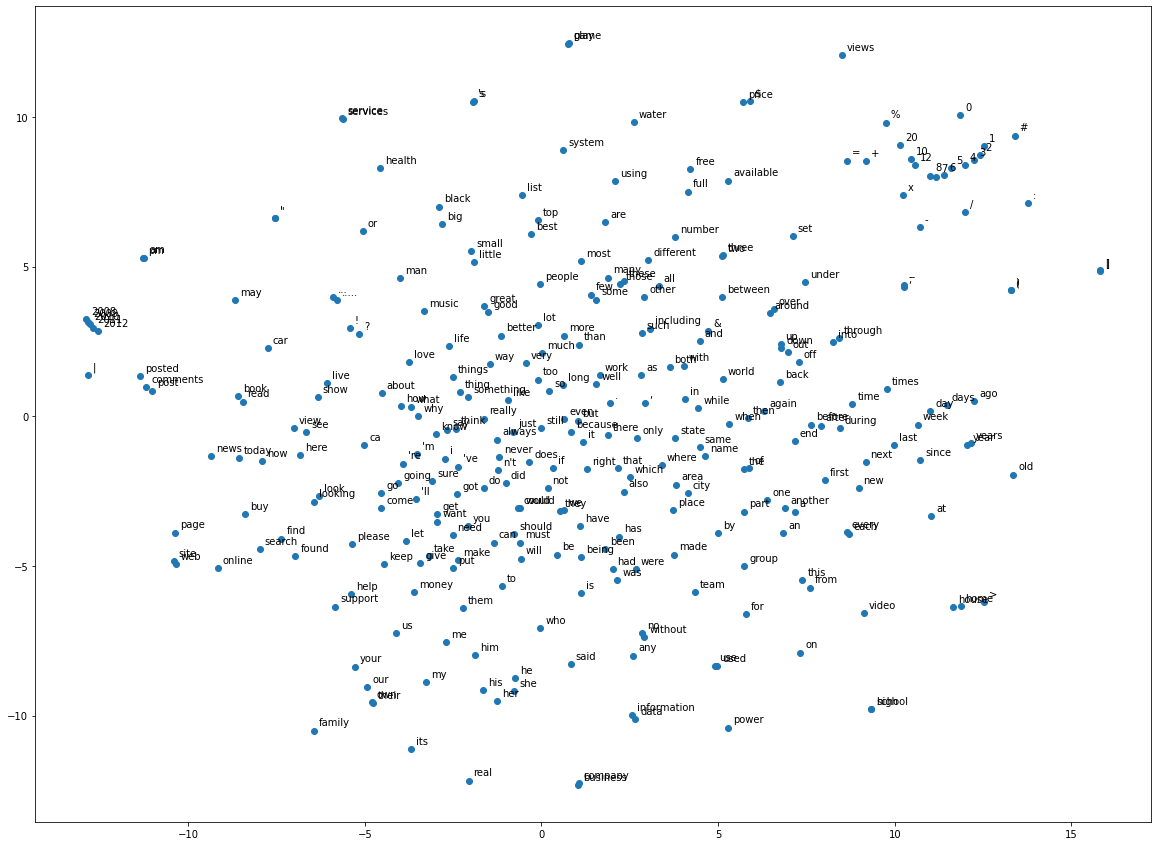

In [103]:
filter = {"man","he","services"}
#model_filtered = dictfilt(model,filter)
model_filtered = model


tsne = TSNE(perplexity=40, n_components=2, random_state=0, init="pca", learning_rate=200, n_iter=2500)

words =  list(model_filtered.keys())
vectors = [model_filtered[word] for word in words]

Y = tsne.fit_transform(vectors[:300])

plt.rcParams["figure.figsize"] = (20,15)
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points")

plt.show()